<a href="https://colab.research.google.com/github/toplyn/structured/blob/master/Python_Exercise_2_Travel_Pony_Ad_Cost_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code analyzes facebook advertisements and spend to better understand spend, relationships, and what may drive increased advertisement spending.

In [0]:
## import libraries for plotting and linear model
import pandas as pd
import time
import numpy as np
import statsmodels.api as sm
import seaborn as sns

1. Historgram Amount Spent (USD) and Scatter Plots
- Most relationships may have some sort of a linear relationship, though they are weak, if anything, which means a linear regression model may not be the best fit

2. Linear regression with one-hot coding for Campaign Name

3. Three predictors with the highest value vs Amount Spent (USD)
- 1.TravelPony: Conversion Test	(Coeff 52)
- 2.Simple_Multi_Fill_Campaign_2_559	(Coeff 23)
- 3.Simple_Multi_Fill_Campaign_2_601	(Coeff 18)




In [0]:
## Mount google drive to access data file
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
## Load data from drive
final = 'drive/My Drive/Colab Notebooks/Travel Pony Facebook.csv'
pony = pd.read_csv(final)

In [0]:
## See first rows of data
pony.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


In [0]:
## Find non-zero records for spend
nonzero = pony['Amount Spent (USD)'] != 0
pony0 = pony[nonzero]

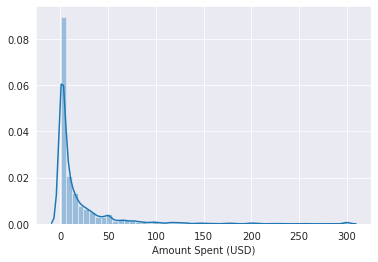

In [0]:
## Review distribution of spend on ads
sns.set_style('darkgrid')
sns.distplot(pony0['Amount Spent (USD)'])

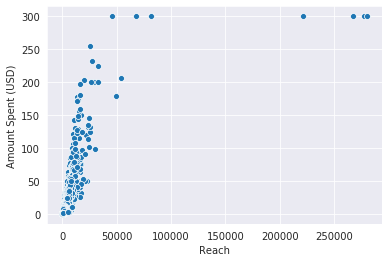

In [0]:
## Scatter plots Amount Spent (USD) vs reach, frequency, impressions and clicks
sns.scatterplot(x = pony0['Reach'], y = pony0['Amount Spent (USD)'])

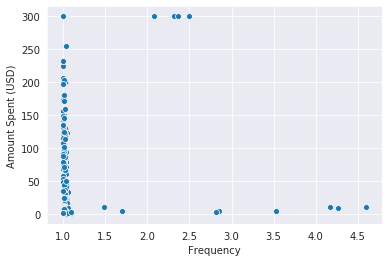

In [0]:
sns.scatterplot(x = pony0['Frequency'], y = pony0['Amount Spent (USD)'])

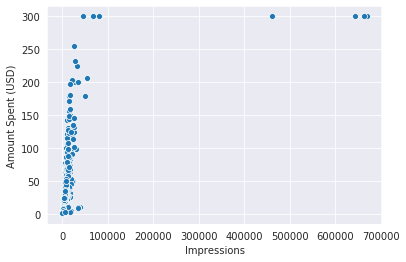

In [0]:
sns.scatterplot(x = pony0['Impressions'], y = pony0['Amount Spent (USD)'])

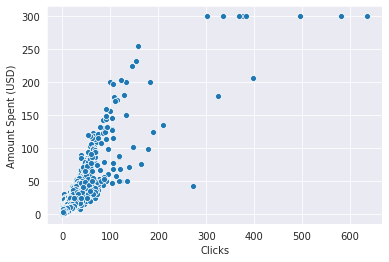

In [0]:
sns.scatterplot(x = pony0['Clicks'], y = pony0['Amount Spent (USD)'])

In [0]:
## Create dummy variables
pony0dummies = pd.concat((pony0, pd.get_dummies(pony0['Campaign Name'], drop_first = True)),axis = 1)
pony0dummies

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD),Cyber Weekend,Nanigans_2_637,Nanigans_2_638,Nanigans_2_639,Nanigans_2_640,Nanigans_2_641,Nanigans_2_642,Nanigans_2_643,Nanigans_2_644,Nanigans_2_645,Nanigans_2_646,Nanigans_2_647,Nanigans_2_648,Nanigans_2_651,Nanigans_2_652,Nanigans_2_653,Nanigans_2_654,Nanigans_2_655,Nanigans_2_656,Nanigans_2_659,...,Simple_Multi_Fill_Campaign_2_558,Simple_Multi_Fill_Campaign_2_559,Simple_Multi_Fill_Campaign_2_560,Simple_Multi_Fill_Campaign_2_561,Simple_Multi_Fill_Campaign_2_562,Simple_Multi_Fill_Campaign_2_563,Simple_Multi_Fill_Campaign_2_564,Simple_Multi_Fill_Campaign_2_565,Simple_Multi_Fill_Campaign_2_566,Simple_Multi_Fill_Campaign_2_567,Simple_Multi_Fill_Campaign_2_568,Simple_Multi_Fill_Campaign_2_569,Simple_Multi_Fill_Campaign_2_575,Simple_Multi_Fill_Campaign_2_579,Simple_Multi_Fill_Campaign_2_583,Simple_Multi_Fill_Campaign_2_596,Simple_Multi_Fill_Campaign_2_597,Simple_Multi_Fill_Campaign_2_598,Simple_Multi_Fill_Campaign_2_599,Simple_Multi_Fill_Campaign_2_600,Simple_Multi_Fill_Campaign_2_601,Simple_Multi_Fill_Campaign_2_602,Simple_Multi_Fill_Campaign_2_603,Simple_Multi_Fill_Campaign_2_617,Simple_Multi_Fill_Campaign_2_619,Simple_Multi_Fill_Campaign_2_620,Simple_Multi_Fill_Campaign_2_621,Simple_Multi_Fill_Campaign_2_622,Simple_Multi_Fill_Campaign_2_623,Simple_Multi_Fill_Campaign_2_624,Simple_Multi_Fill_Campaign_2_626,Simple_Multi_Fill_Campaign_2_627,Simple_Multi_Fill_Campaign_2_631,Simple_Multi_Fill_Campaign_2_633,Simple_Multi_Fill_Campaign_2_634,Simple_Multi_Fill_Campaign_2_636,TravelPony: Conversion Test,TravelPony: General Ads,Travelpony-Page Likes-US-13-65,http://travelpony...-Clicks-US-13-65
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,2013-06-11,2013-06-11,Bob Jackson,Ad 1,298,1.003356,299,2,1,1.05,0,1,1,1,0,0,0,0,0.00,1.050000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3701,2013-06-10,2013-06-10,Bob Jackson,Ad 1,514,1.060311,545,3,3,1.60,0,3,3,3,0,0,0,0,0.00,0.533333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3702,2013-06-09,2013-06-09,Bob Jackson,Ad 1,111,1.000000,111,1,1,0.99,0,1,1,1,0,0,0,0,0.0

In [0]:
## Multiple regression model
pny_target = pony0dummies['Amount Spent (USD)']
dependentx = pony0dummies.drop(pony0dummies[['Campaign Name','Amount Spent (USD)',
                                             'Start Date','End Date','Account',
                                             'Cost per Page Like (USD)',
                                             'Cost per Page Engagement (USD)']], axis = 1)
mods = sm.OLS(pny_target, dependentx).fit()

In [0]:
## Gather model coefficients
pars = list(mods.params)
type(pars)

list

In [0]:
## Review coefficients
predictors_model = pd.DataFrame(dependentx.columns)
predictors_model.columns = ['Variable']
predictors_model['Coeff'] = 0
for i in range(len(pars)):
  predictors_model.Coeff[i] = pars[i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
## What values appear to have the strongest impact
predictors_model.nlargest(3, ['Coeff'])

,Variable,Coeff
390,TravelPony: Conversion Test,52
355,Simple_Multi_Fill_Campaign_2_559,23
374,Simple_Multi_Fill_Campaign_2_601,18
